<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/PyTorch/%EB%94%A5%EB%9F%AC%EB%8B%9D%20%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%20%EA%B5%90%EA%B3%BC%EC%84%9C/11%EC%9E%A5_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [3]:
!git clone https://github.com/gilbutITbook/080289.git

Cloning into '080289'...
remote: Enumerating objects: 2273, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 2273 (delta 3), reused 25 (delta 2), pack-reused 2246
Receiving objects: 100% (2273/2273), 330.27 MiB | 18.66 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Checking out files: 100% (2590/2590), done.


# K-평균 군집화

In [1]:
!pip install kmeans_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from kmeans_pytorch import kmeans, kmeans_predict

In [4]:
df = pd.read_csv('/content/080289/chap11/data/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data = pd.get_dummies(df, columns=['Species'])

In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


In [8]:
from sklearn.model_selection import train_test_split

x, y = train_test_split(data, test_size=0.2, random_state=2022)

In [9]:
if torch.cuda.is_available():

  device = torch.device('cuda:0')

else:
  device = torch.device('cpu')

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit(data).transform(x)
y_scaled = scaler.fit(y).transform(y)

In [11]:
x = torch.from_numpy(X_scaled)
y = torch.from_numpy(y_scaled)

In [13]:
print(x.size())
print(y.size())

torch.Size([120, 8])
torch.Size([30, 8])


In [14]:
num_clusters = 3
cluster_ids_x, cluster_centers = kmeans(X=x,
                                        num_clusters=num_clusters,
                                        distance='euclidean',
                                        device=device)

running k-means on cuda:0..


[running kmeans]: 4it [00:00, 43.31it/s, center_shift=0.000000, iteration=4, tol=0.000100]


In [15]:
print(cluster_ids_x)
print(cluster_centers)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2,
        2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1,
        2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1])
tensor([[ 1.1366,  0.1639, -0.8192,  0.7587,  0.8469, -0.7071, -0.7071,  1.4142],
        [ 1.2074,  1.2909,  0.2171,  1.1336,  1.2650, -0.7071, -0.7071,  1.4142],
        [-0.5736, -0.4540,  0.1064, -0.4979, -0.5257,  0.3408,  0.3663, -0.7071]])


In [16]:
cluster_ids_y = kmeans_predict(y, cluster_centers, 'euclidean', device=device)

predicting on cuda:0..


In [17]:
print(cluster_ids_y)

tensor([0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2,
        1, 0, 0, 2, 2, 0])


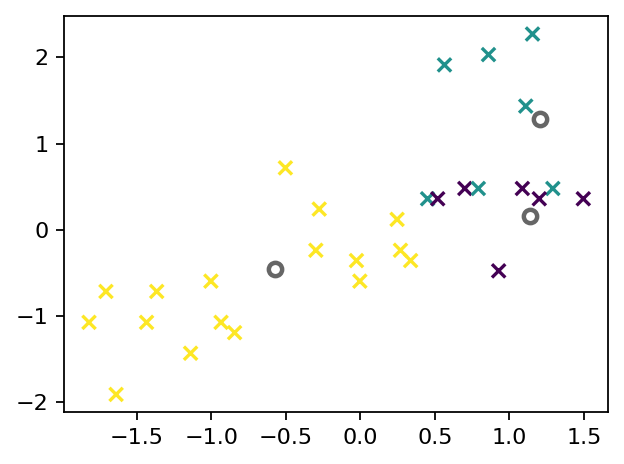

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(y[:, 0], y[:, 1],c=cluster_ids_y, cmap='viridis', marker='x')

plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)

plt.tight_layout()
plt.show()

# 가우시안 혼합 모델

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

X_train = np.load('/content/080289/chap11/data/data.npy')

In [21]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

GaussianMixture(n_components=2)

In [22]:
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[3.0363831  3.09828041]
 [1.60629419 1.3470999 ]]


[[[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]

 [[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]]


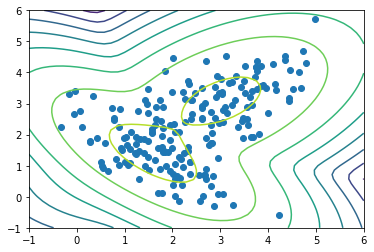

In [23]:
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))

plt.contour(X, Y, Z)
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()

# 자기 조직화 지도

In [24]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=8d930c30d5e1e7406914d4a2e7bdbe3dd0c312f0f4e4196d51e3fd933d954574
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [25]:
import numpy as np
from sklearn.datasets import load_digits
from minisom import MiniSom  
from pylab import plot,axis,show,pcolor,colorbar,bone

digits = load_digits()
data = digits.data
labels = digits.target

SOM 초기화.

. SOM 진행 종료


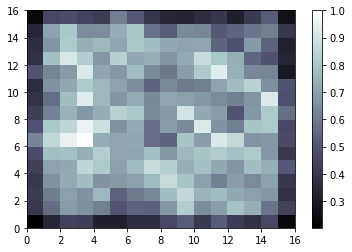

In [26]:
som = MiniSom(16,16,64,sigma=1.0,learning_rate=0.5)
som.random_weights_init(data)
print("SOM 초기화.")
som.train_random(data,10000) 
print("\n. SOM 진행 종료")

bone()
pcolor(som.distance_map().T) 
colorbar()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: F

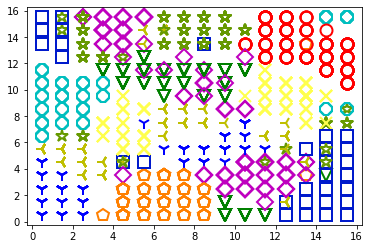

In [27]:
labels[labels == '0'] = 0
labels[labels == '1'] = 1
labels[labels == '2'] = 2
labels[labels == '3'] = 3
labels[labels == '4'] = 4
labels[labels == '5'] = 5
labels[labels == '6'] = 6
labels[labels == '7'] = 7
labels[labels == '8'] = 8
labels[labels == '9'] = 9

markers = ['o', 'v', '1', '3', '8', 's', 'p', 'x', 'D', '*']
colors = ["r", "g", "b", "y", "c", (0,0.1,0.8), (1,0.5,0), (1,1,0.3), "m", (0.4,0.6,0)]
for cnt,xx in enumerate(data):
   w = som.winner(xx) 
   plot(w[0]+.5,w[1]+.5,markers[labels[cnt]],    
   markerfacecolor='None', markeredgecolor=colors[labels[cnt]], 
   markersize=12, markeredgewidth=2)
show()